#Plotting 3D Model of Phantom

This code takes resized images and the error obtained from the prediction converts the error to a measurement value and applies it to scale image properly.

## Install and Imports

In [ ]:
# For 3D visualisation
!pip install pypotree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 147 kB 7.2 MB/s 
  Created wheel for pypotree: filename=pypotree-1.0.5-py3-none-any.whl size=10282009 sha256=d69661edc7f4427117175302f9a0caeec256a057059abd73601f2fcdd0b9823b
  Stored in directory: /root/.cache/pip/wheels/2e/32/d3/23cf10354de69b5c26103ea3937c326388338c2046eb65ad22
Successfully built pypotree


In [ ]:
# For Pandas data manipulation
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Needed to work with .xls files
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
!pip install pyvista

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 17.8 MB/s 
     |████████████████████████████████| 79.3 MB 1.2 MB/s 


In [ ]:
# Used to retrieve files/ pathnames matching a specified pattern 
import glob
# Get current user environment
import os
# Used to work with arrays and matrix data structures
import numpy as np
# Data manipulation and analysis tool using data structures
import pandas as pd
# Used to evaluate machine learning performance, by splitting dataset
from sklearn.model_selection import train_test_split
# Training and inference of neural networks
import tensorflow as tf
# Measure of variance form dependent value to independent value
from sklearn.metrics import r2_score
# Data visualisation
import seaborn as sns
# Data visualisation
import matplotlib.pyplot as plt
# Using Linear Regression
from sklearn.linear_model import LinearRegression
# For solving computer vision problems
import cv2
# cv2 has some issues and this solves it for colab
from google.colab.patches import cv2_imshow
# Python Imaging library that allows for more extensive editing capabilities
from PIL import Image, ImageChops
# Working with paths, checking if they are absolute or not (True or False)
from pathlib import Path
# Used to do mathematical operations easily
import math

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pypotree

## Importing Data

Need error prediction from Scan

In [ ]:
# read by default 1st sheet of an excel file
Error = pd.read_excel('Error_Per_Diff_Image_Updated.xls')
# Printing contents of file
print(Error)

    ERR1  ERR2  ERR3  ERR4  ERR5  ERR6  ERR7  ERR8  ERR9  ERR10  ERR11  ERR12  \
0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
2    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
4    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
89   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
90   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
91   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
92   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
93   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   

    ERR13  
0     0.0  
1  

## Beginning of Actual Code

In [ ]:
# Using K-Means to get edge of scan. Helps with processing later
def kmeans(original_image):
    crop_img = original_image #[50:400, 50:650]
    img=cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB)
    vectorized = img.reshape((-1,3))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    attempts=10
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    figure_size = 15
    
    edges = cv2.Canny(result_image,150,200)
    
    return edges

Taking the resized Image from Official_Rescaling_Images apply k-means to it. This will give the outline which is a lot less demanding to produce a model.

In [ ]:
cv_img = []

for i in range(1,89):
  #print(i)
  if i < 10:
    for img in glob.glob(f"/content/drive/MyDrive/Resized_All/Resize1/{i}.jpg"):   
      n = cv2.imread(img)
      cv_img.append(n)
      img=kmeans(n)
      cv2.imwrite(f'/content/drive/My Drive/Resized_All/Resize1/tester1/{i}.jpg',img)
      #cv2.imwrite(f'/content/drive/My Drive/Diff_All/Diff{l}/{i}.jpg' , diff)
      
  else:
    for img in glob.glob(f"/content/drive/MyDrive/Resized_All/Resize1/{i}.jpg"):   
      n = cv2.imread(img)
      cv_img.append(n)
      img=kmeans(n)
      cv2.imwrite(f'/content/drive/My Drive/Resized_All/Resize1/tester1/{i}.jpg',img)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


In [ ]:
cv_img = []
# Going through Edge Detected Images
for i in range(1,89):
  for img in glob.glob(f'/content/drive/MyDrive/Resized_All/Resize1/tester1/{i}.jpg'):    
    print(img)
    n= cv2.imread(img)
    cv_img.append(n)

/content/drive/MyDrive/Resized_All/Resize1/tester1/1.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/2.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/3.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/4.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/5.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/6.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/7.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/8.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/9.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/10.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/11.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/12.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/13.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/14.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/15.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/16.jpg
/content/drive/MyDrive/Resized_All/Resize1/tester1/17.jpg
/content/drive/MyDrive/

## Obtaining values for x and z axis

In [ ]:
# Obtaining x and z coordinates from Images in Array
z_cordinate=[]
x_cordinate=[]
for i in range(0,len(cv_img)):
  #print(i)
  h,w,_= cv_img[i].shape
  #print(h)
  z=[]
  x=[]
  for l in range(0,h):
    for j in range(0,w):
      b,g,r=cv_img[i][l,j]
      #if b!=0:
        #print(b)
      #if (b,g,r)!=(0,0,0):
      if (b,g,r)==(255,255,255):
        z.append(j)
        x.append(l)
        
  z_cordinate.append(z)
  x_cordinate.append(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


## Predicted Variable Height

Value here is just test value to prove concept

In [ ]:
# Variable_Array_Prediction
s=0.45 #1.5
y_axis=[]
for i in range(1,89):
  y_axis.append(s)
  s=s+0.45
print(y_axis)

[0.45, 0.9, 1.35, 1.8, 2.25, 2.7, 3.1500000000000004, 3.6000000000000005, 4.050000000000001, 4.500000000000001, 4.950000000000001, 5.400000000000001, 5.850000000000001, 6.300000000000002, 6.750000000000002, 7.200000000000002, 7.650000000000002, 8.100000000000001, 8.55, 9.0, 9.45, 9.899999999999999, 10.349999999999998, 10.799999999999997, 11.249999999999996, 11.699999999999996, 12.149999999999995, 12.599999999999994, 13.049999999999994, 13.499999999999993, 13.949999999999992, 14.399999999999991, 14.84999999999999, 15.29999999999999, 15.74999999999999, 16.19999999999999, 16.649999999999988, 17.099999999999987, 17.549999999999986, 17.999999999999986, 18.449999999999985, 18.899999999999984, 19.349999999999984, 19.799999999999983, 20.249999999999982, 20.69999999999998, 21.14999999999998, 21.59999999999998, 22.04999999999998, 22.49999999999998, 22.949999999999978, 23.399999999999977, 23.849999999999977, 24.299999999999976, 24.749999999999975, 25.199999999999974, 25.649999999999974, 26.099999

## Plotting in 3D Space

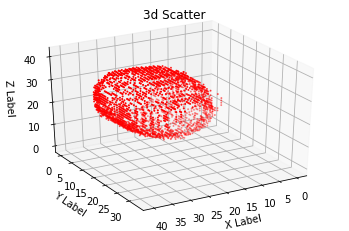

In [ ]:
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
test=[]
for i in range(0,len(y_axis)):

  ax.scatter(x_cordinate[i], y_axis[i], z_cordinate[i], color='red',s=1)
  for k in range(len(x_cordinate[i])):
    test.append([x_cordinate[i][k],z_cordinate[i][k],y_axis[i]])


# syntax for plotting
ax.set_title('3d Scatter')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(30, 60)
plt.show()

In [ ]:
cloudpath = pypotree.generate_cloud_for_display(test)
pypotree.display_cloud_colab(cloudpath)

/usr/local/lib/python3.7/dist-packages/bin/PotreeConverter .tmp.txt -f xyz -o point_clouds -p 3273f1 --material ELEVATION --edl-enabled --overwrite
server on port 15893: thread <Thread(Thread-13, started 140394217596672)> 
https://localhost:15893/point_clouds/pointclouds/3273f1


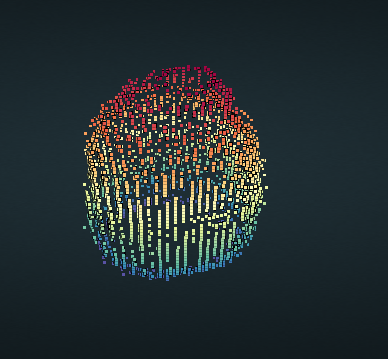